The code is currently for the region >50°N, to change it to >65°N, 74:96 needs to be adjusted to 82:96.

C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\coords.py:1982: UserWarning: Collapsing a non-c

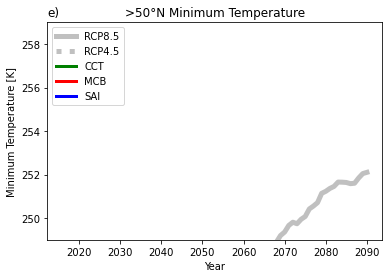

In [5]:
path = r""

import iris

import Min_clm_2 as Mean_Time_Series ## ## This is a subfunction to calculate the 21-year weighted running mean of the yearly minimum temperature over the given area

import matplotlib.pyplot as plt

variable = "TREFMNAV" ## for TS (T_mean) --> no landmask!!!!!

landmask = iris.load(path + "TSA_01_sel_var_CCT.all.nc")[0][:,74:96,:]

CCT_01 = iris.load(path + variable + "_01_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_02 = iris.load(path + variable + "_02_sel_var_CCT.all.nc")[0][12:,74:96,:]
CCT_03 = iris.load(path + variable + "_03_sel_var_CCT.all.nc")[0][:,74:96,:]

CCT_mean = Mean_Time_Series.rfg_mean_clm(CCT_01, CCT_02, CCT_03, "")

MSB_01 = iris.load(path + variable + "_01_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_02 = iris.load(path + variable + "_02_sel_var_MSB.all.nc")[0][:,74:96,:]
MSB_03 = iris.load(path + variable + "_03_sel_var_MSB.all.nc")[0][:,74:96,:]


MSB_mean = Mean_Time_Series.rfg_mean_clm(MSB_01, MSB_02, MSB_03, "")

SAI_01 = iris.load(path + variable + "_01_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_02 = iris.load(path + variable + "_02_sel_var_SAI.all.nc")[0][:,74:96,:]
SAI_03 = iris.load(path + variable + "_03_sel_var_SAI.all.nc")[0][:,74:96,:]


SAI_mean = Mean_Time_Series.rfg_mean_clm(SAI_01, SAI_02, SAI_03, "")

RCP = iris.load(path + variable + "_sel_var_RCP85.all.nc")[0][:,74:96,:]

RCP_mean = Mean_Time_Series.rcp_mean_clm(RCP, "")

RCP45 = iris.load(path + "RCP45_ens01_tmin_tmax.nc")[1][:,74:96,:]
RCP45.data.mask = landmask.data.mask

RCP45_mean = Mean_Time_Series.rcp_mean_clm(RCP45, "")

RFG_years = list(range(2030, 2091))
RCP_years = list(range(2016, 2091))
CCT_years = list(range(2031, 2091))

plt.plot(RCP_years, RCP_mean, color = "#C0C0C0", label = "RCP8.5", linewidth=5.0) #  - RCP_mean[0]
plt.plot(RFG_years, RCP45_mean, color = "#C0C0C0", linestyle ="dotted", label = "RCP4.5", linewidth=5.0) #  - RCP_mean[0]
plt.plot(CCT_years, CCT_mean, color = "green", label = "CCT", linewidth=3.0)
plt.plot(RFG_years, MSB_mean, color = "red", label = "MCB", linewidth=3.0)
plt.plot(RFG_years, SAI_mean, color = "blue", label = "SAI", linewidth=3.0)
#plt.plot([2016, 2091],[287.1533607606747 + 1.5, 287.1533607606747 + 1.5])
plt.xlabel("Year")
plt.ylabel("Minimum Temperature [K]")
plt.title(">50°N Minimum Temperature")
plt.title("e)",  loc = "left")

# plt.xlim(-0.1,2.2)
plt.ylim(249,259)
plt.legend(loc = 2)
#plt.show()